# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
from collections import Counter
from nltk import ngrams
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [7]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
        q="Bitcoin",
        language= "en",
        sort_by="relevancy"
)
print(f"total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")
Bitcoin_headlines["articles"][0]

total articles about Bitcoin: 4693


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [8]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
        q="Ethereum",
        language= "en",
        sort_by="relevancy"
)
print(f"total articles about Ethereum: {Ethereum_headlines['totalResults']}")
Ethereum_headlines["articles"][0]

total articles about Ethereum: 1296


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        bitcoin_sentiments.append({
            "Date" : article["publishedAt"][:10],
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_sent_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Date", "Compound", "Negative", "Neutral", "Positive", "Text"]
btc_sent_df = btc_sent_df[cols]

btc_sent_df.head()

,Date,Compound,Negative,Neutral,Positive,Text
0,2020-11-12,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,2020-12-03,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
2,2020-11-12,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
3,2020-11-20,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,2020-12-06,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [12]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
        
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
# Create DataFrame
eth_sent_df = pd.DataFrame(ethereum_sentiments)
# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sent_df = eth_sent_df[cols]
eth_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [13]:
# Describe the Bitcoin Sentiment
btc_sent_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.170479,0.014421,0.928684,0.056895
std,0.328269,0.047886,0.087898,0.066958
min,-0.670500,0.000000,0.737000,0.000000
25%,0.000000,0.000000,0.860500,0.000000
50%,0.000000,0.000000,0.950000,0.050000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.199000,1.000000,0.174000


In [14]:
# Describe the Ethereum Sentiment
eth_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive of 0.60950

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score 20

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score 20

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
from nltk.corpus import reuters, stopwords
# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idial\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\idial\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idial\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Expand the default stopwords list if necessary
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
   # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text


In [21]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_sent_df.Text]   
btc_sent_df['Tokens'] = btc_tokens
btc_sent_df.head()

,Date,Compound,Negative,Neutral,Positive,Text,Tokens
0,2020-11-12,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, cryptocurrency, startup,..."
2,2020-11-12,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-20,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,2020-12-06,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [24]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_sent_df.text]   
eth_sent_df['Tokens'] = eth_tokens
eth_sent_df.head()

,date,text,compound,positive,negative,neutral,Tokens
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, virtual, currenc..."
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, xrp, soar..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_sent_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('former', 'microsoft'): 1,
 ('microsoft', 'software'): 1,
 ('software', 'engineer'): 1,
 ('engineer', 'ukraine'): 1,
 ('ukraine', 'ha'): 1,
 ('ha', 'sentenced'): 1,
 ('sentenced', 'nine'): 1,
 ('nine', 'year'): 1,
 ('year', 'prison'): 1,
 ('prison', 'stealing'): 1}

In [28]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_sent_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('paypal', 'bringing'): 1,
 ('bringing', 'newlyannounced'): 1,
 ('newlyannounced', 'support'): 1,
 ('support', 'cryptocurrency'): 1,
 ('cryptocurrency', 'u'): 1,
 ('u', 'account'): 1,
 ('account', 'first'): 1,
 ('first', 'announced'): 1,
 ('announced', 'plan'): 1,
 ('plan', 'open'): 1}

In [29]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Get the top 10 words for Bitcoin
bigstr = []
for tokens in btc_sent_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 19),
 ('currency', 8),
 ('reuters', 8),
 ('ha', 7),
 ('photo', 7),
 ('file', 6),
 ('representation', 6),
 ('virtual', 6),
 ('cryptocurrency', 5),
 ('illustration', 5)]

In [32]:
# Get the top 10 words for Ethereum
bigstr = []
for tokens in eth_sent_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 20),
 ('reuters', 15),
 ('photo', 10),
 ('currency', 10),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('reutersdado', 8),
 ('file', 7),
 ('seen', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

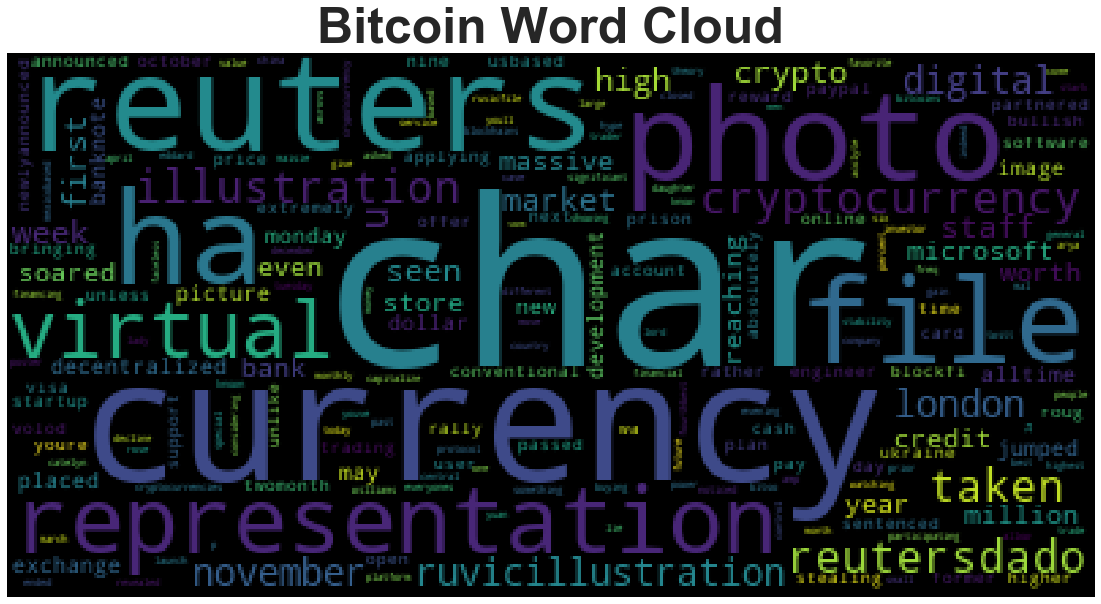

In [35]:
# Generate the Bitcoin word cloud
btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_sent_df.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

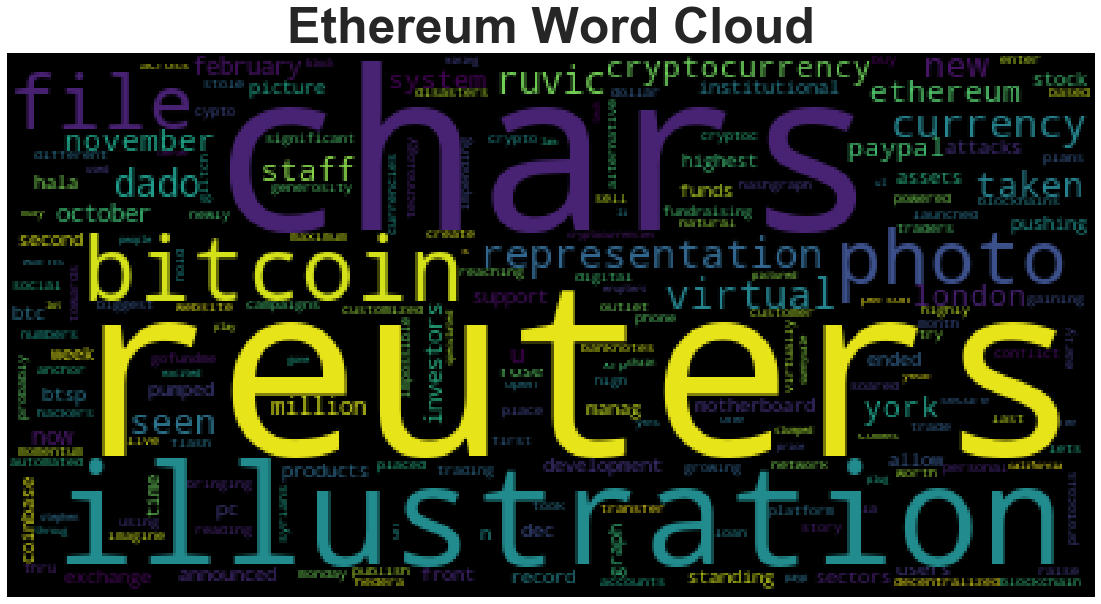

In [37]:
# Generate the Ethereum word cloud
eth_corpus = ''
for token in eth_sent_df.text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [41]:
# Concatenate all of the bitcoin text together
btc_corpus

"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the c

In [42]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_corpus)
# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"


In [43]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [44]:
# List all Entities
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$62 million',
 '10,000',
 '10.8 percent',
 '12,800',
 '19,665',
 '2016 to 2018',
 '500',
 '7',
 'April',
 'Arya Stark',
 'BBC News',
 'Bitcoin',
 'December 2017',
 'Eddard',
 'February 3, 2018',
 'Justin HarperBusiness',
 'Lady Catelyn',
 'March 13, 2020',
 'May 26, 2020',
 'Mexico',
 'Microsoft',
 'Monday',
 'November',
 'November 19, 2020',
 'November 2017',
 'October',
 'REUTERS/',
 'REUTERS/Dado Ruvic/Illustration',
 'Reuters',
 'Tom Wilson',
 'Tuesday',
 'U.S.',
 'US',
 'Ukraine',
 'Williams',
 'XRP',
 'above $17,000',
 'above $18,000',
 'acolyte',
 'bitcoin',
 'chars]4',
 'chars]8',
 'digital',
 'digital yuan',
 'evening',
 'first',
 'fourth',
 'hype',
 'monthly',
 'more than $10 million',
 'more than $18,000',
 'nine years',
 'the Faceless Men',
 'the People’s Bank of China',
 'the next 20 days',
 'the past few weeks',
 'this week',
 'three-year',
 'today',
 'two-month'}

---

## Ethereum NER

In [45]:
# Concatenate all of the bitcoin text together
eth_corpus

"paypal is bringing its newly-announced support for cryptocurrency to all us accounts. it first announced plans to open cryptocurrency trading to us-based users in october, but until now it was only a… [+589 chars]file photo: representation of the ethereum virtual currency standing on the pc motherboard is seen in this illustration picture, february 3, 2018. reuters/dado ruvic/illustration\r\nlondon (reuters) - … [+1237 chars]file photo: representation of the ethereum virtual currency standing on the pc motherboard is seen in this illustration picture, february 3, 2018. reuters/dado ruvic/illustration\r\nlondon (reuters) - … [+1237 chars]london (reuters) - digital currencies ethereum and xrp soared on monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nfile photo: representation of the ethereum virtual currency… [+1950 chars]new york (reuters) - institutional investors pumped $429 million into cryptocurrency funds and products for the week ended dec. 7, the sec

In [46]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_corpus)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [47]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [48]:
# List all Entities
eth_ents = ([ent.text for ent in eth_ner.ents ])
set(eth_ents)

{'$24 million',
 '$429 million',
 '1',
 '20,000',
 'bitcoin',
 'btsp rose',
 'california',
 'chars]london',
 'chars]new york',
 'chars]the new york times',
 'dado ruvic',
 'early february this year',
 'february 3, 2018',
 'first',
 'hedera',
 'last month',
 'london',
 'may 26, 2020',
 'monday',
 'new york',
 'november 19, 2020',
 'october',
 'october 28, 2013',
 'one',
 'paypal',
 'reuters',
 'reuters/stephen lam\r\n<ul><li',
 'second',
 'sunnyvale',
 'the week ended dec. 7',
 'u.s.',
 'un',
 'us',
 'xrp'}